# 第5回課題
第5回課題では，以下の項目を満たすように分析してください．

明確な解答は用意していませんが，少なくとも間違っていないと言える推論をするようにしてください．

- データの取得
- データの確認
 - 特徴量の確認
 - ラベルの確認
- 仮説を立てる
- データの分析
- モデルの訓練
- 予測
- 精度の確認
- 仮説の確認

# データの取得
wine data 以外を利用してデータ分析してください．

なるべく，ラベルと属性から推論が立てやすいデータを選択するとやりやすいです．

In [218]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import load_linnerud

all_data = load_linnerud()

# データの確認
データ分析以前にわかることを確認．特徴量の属性やドメイン知識など
- 特徴量の確認
- ラベルの確認

In [219]:
all_data.keys()

dict_keys(['data', 'feature_names', 'target', 'target_names', 'DESCR', 'data_filename', 'target_filename'])

In [220]:
all_data["feature_names"]

['Chins', 'Situps', 'Jumps']

In [221]:
all_data["target_names"]

['Weight', 'Waist', 'Pulse']

In [222]:
data = all_data["data"]
feature_names = all_data["feature_names"]
target = all_data["target"]
target_names = all_data["target_names"]

feature_df = pd.DataFrame(data, columns=feature_names)
target_df = pd.DataFrame(target, columns=target_names)
lin_df = pd.concat([feature_df, target_df], axis=1)
lin_df.head()
#20人のデータ
#懸垂、腹筋、跳躍、体重、ウエスト、脈拍

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


# 仮説を立てる
データについて，導きたい仮説と結論を整理してください．

鍛えている（体重はあるがウエストが細い）人ならば体重の値が大きくとも3つの運動（懸垂・腹筋・跳躍）は高レベルとなると考えられるが、体重・ウエストともに大きな値であればこれらの運動の記録は低レベルとなるのではないか。

# データの分析

In [223]:
lin_df.describe()

,Chins,Situps,Jumps,Weight,Waist,Pulse
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


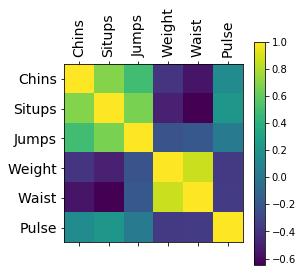

In [224]:
fig = plt.figure(figsize=(4, 4))
plt.matshow(lin_df.corr("pearson"), fignum=fig.number)
plt.xticks(range(lin_df.shape[1]), lin_df.columns, fontsize=14, rotation=90)
plt.yticks(range(lin_df.shape[1]), lin_df.columns, fontsize=14)
plt.colorbar()

In [225]:
corr = lin_df.corr().values
[[lin_df.columns[i], lin_df.columns[j], corr[i][j]] for i in range(lin_df.shape[1]) for j in range(lin_df.shape[1]) if abs(corr[i][j]) >= 0.4 and corr[i][j] != 1 and i > j]
#基準は0.4とした

[['Situps', 'Chins', 0.6957274276618715],
 ['Jumps', 'Chins', 0.4957601807891702],
 ['Jumps', 'Situps', 0.6692060795792598],
 ['Weight', 'Situps', -0.49308364502792096],
 ['Waist', 'Chins', -0.5522321318045051],
 ['Waist', 'Situps', -0.6455980279273232],
 ['Waist', 'Weight', 0.8702434920706915]]

In [226]:
#ウエストが太い人ほど懸垂・腹筋の記録が低く、体重のある人ほど腹筋の記録が低く、ウエストと体重には強い正の相関があることが分かる。
#また、運動3種目はそれぞれ互いに正の相関があることが分かる。

#体重はあるがウエストが細い人はこのデータ中にはほとんどいないことが考えられる。
#腹筋の記録は体重・ウエストともに大きな値なほど低くなっている。
#脈拍は他の要素との強い相関関係は見られなかった。

In [227]:
from sklearn import linear_model

Text(0, 0.5, 'Weight')

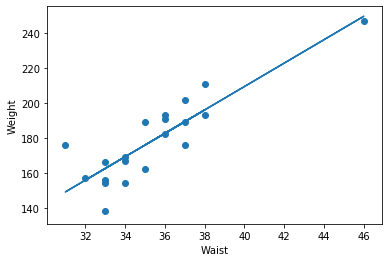

In [228]:
clf = linear_model.LinearRegression()
X = lin_df["Waist"].values.reshape(-1, 1)
Y = lin_df["Weight"]
clf.fit(X, Y)
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("Waist")
plt.ylabel("Weight")

Text(0, 0.5, 'Chins')

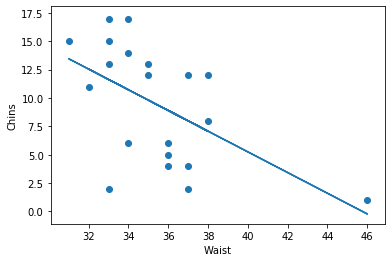

In [229]:
clf = linear_model.LinearRegression()
X = lin_df["Waist"].values.reshape(-1, 1)
Y = lin_df["Chins"]
clf.fit(X, Y)
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("Waist")
plt.ylabel("Chins")

Text(0, 0.5, 'Situps')

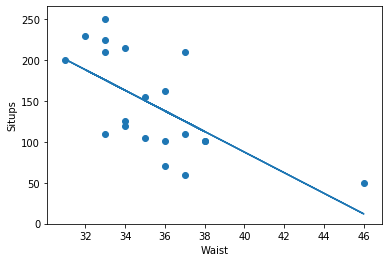

In [230]:
clf = linear_model.LinearRegression()
X = lin_df["Waist"].values.reshape(-1, 1)
Y = lin_df["Situps"]
clf.fit(X, Y)
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("Waist")
plt.ylabel("Situps")

Text(0, 0.5, 'Situps')

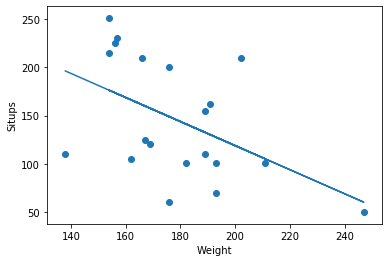

In [231]:
clf = linear_model.LinearRegression()
X = lin_df["Weight"].values.reshape(-1, 1)
Y = lin_df["Situps"]
clf.fit(X, Y)
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("Weight")
plt.ylabel("Situps")

(array([1., 1., 4., 0., 3., 2., 3., 0., 3., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([31.  , 31.75, 32.5 , 33.25, 34.  , 34.75, 35.5 , 36.25, 37.  ,
        37.75, 38.5 , 39.25, 40.  , 40.75, 41.5 , 42.25, 43.  , 43.75,
        44.5 , 45.25, 46.  ]),
 <a list of 20 Patch objects>)

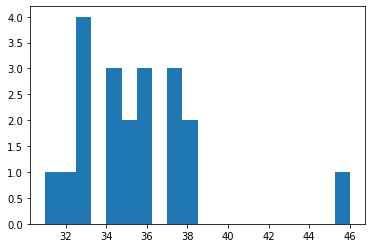

In [232]:
plt.hist(lin_df["Waist"], bins=20)

(array([1., 0., 2., 2., 1., 3., 2., 0., 1., 3., 2., 1., 0., 1., 0., 0., 0.,
        0., 0., 1.]),
 array([138.  , 143.45, 148.9 , 154.35, 159.8 , 165.25, 170.7 , 176.15,
        181.6 , 187.05, 192.5 , 197.95, 203.4 , 208.85, 214.3 , 219.75,
        225.2 , 230.65, 236.1 , 241.55, 247.  ]),
 <a list of 20 Patch objects>)

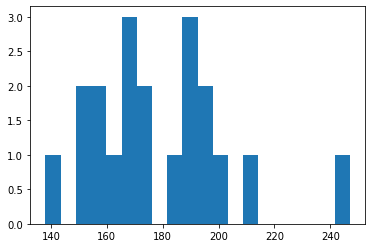

In [233]:
plt.hist(lin_df["Weight"], bins=20)

In [234]:
#極端にWeightおよびWaistの高いデータがある

In [235]:
#極端なデータを抜いたデータフレームを作ってみる
droplin_df = lin_df.drop(13)
droplin_df.head(14)

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


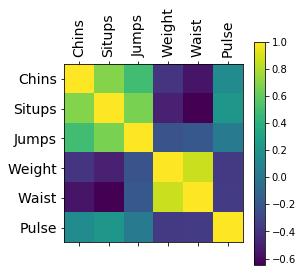

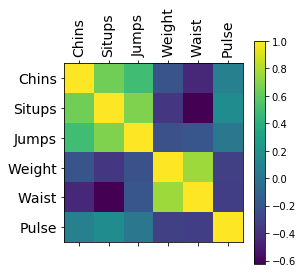

In [236]:
#元々のデータ
fig = plt.figure(figsize=(4, 4))
plt.matshow(lin_df.corr("pearson"), fignum=fig.number)
plt.xticks(range(lin_df.shape[1]), lin_df.columns, fontsize=14, rotation=90)
plt.yticks(range(lin_df.shape[1]), lin_df.columns, fontsize=14)
plt.colorbar()

#極端なデータを除いたデータ
dropfig = plt.figure(figsize=(4, 4))
plt.matshow(droplin_df.corr("pearson"), fignum=dropfig.number)
plt.xticks(range(droplin_df.shape[1]), droplin_df.columns, fontsize=14, rotation=90)
plt.yticks(range(droplin_df.shape[1]), droplin_df.columns, fontsize=14)
plt.colorbar()

In [237]:
#元々のデータ
corr = lin_df.corr().values
[[lin_df.columns[i], lin_df.columns[j], corr[i][j]] for i in range(lin_df.shape[1]) for j in range(lin_df.shape[1]) if abs(corr[i][j]) >= 0.4 and corr[i][j] != 1 and i > j]

[['Situps', 'Chins', 0.6957274276618715],
 ['Jumps', 'Chins', 0.4957601807891702],
 ['Jumps', 'Situps', 0.6692060795792598],
 ['Weight', 'Situps', -0.49308364502792096],
 ['Waist', 'Chins', -0.5522321318045051],
 ['Waist', 'Situps', -0.6455980279273232],
 ['Waist', 'Weight', 0.8702434920706915]]

In [238]:
#極端なデータを除いたデータ
dropcorr = droplin_df.corr().values
[[droplin_df.columns[i], droplin_df.columns[j], dropcorr[i][j]] for i in range(droplin_df.shape[1]) for j in range(droplin_df.shape[1]) if abs(dropcorr[i][j]) >= 0.4 and dropcorr[i][j] != 1 and i > j]

[['Situps', 'Chins', 0.6482626798525669],
 ['Jumps', 'Chins', 0.4994105638045117],
 ['Jumps', 'Situps', 0.684221891958588],
 ['Waist', 'Chins', -0.4461077474431296],
 ['Waist', 'Situps', -0.6249254716081961],
 ['Waist', 'Weight', 0.7621169162432827]]

In [239]:
#[Waist,Chins][Weight,Situps][Waist,Weight]の相関が大幅に弱くなり、
#[Weight,Situps]は基準0.4に届かなくなった

Text(0, 0.5, 'Weight')

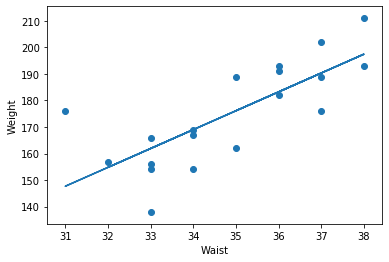

In [240]:
clf = linear_model.LinearRegression()
X = droplin_df["Waist"].values.reshape(-1, 1)
Y = droplin_df["Weight"]
clf.fit(X, Y)
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("Waist")
plt.ylabel("Weight")

Text(0, 0.5, 'Chins')

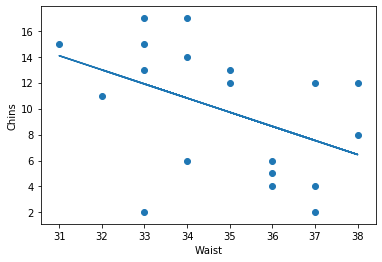

In [241]:
clf = linear_model.LinearRegression()
X = droplin_df["Waist"].values.reshape(-1, 1)
Y = droplin_df["Chins"]
clf.fit(X, Y)
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("Waist")
plt.ylabel("Chins")

Text(0, 0.5, 'Situps')

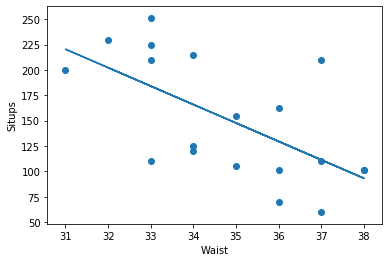

In [242]:
clf = linear_model.LinearRegression()
X = droplin_df["Waist"].values.reshape(-1, 1)
Y = droplin_df["Situps"]
clf.fit(X, Y)
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("Waist")
plt.ylabel("Situps")

Text(0, 0.5, 'Situps')

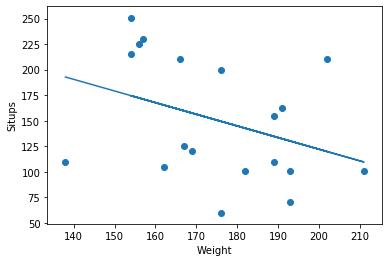

In [243]:
clf = linear_model.LinearRegression()
X = droplin_df["Weight"].values.reshape(-1, 1)
Y = droplin_df["Situps"]
clf.fit(X, Y)
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("Weight")
plt.ylabel("Situps")
#極端なデータを排除すると確かに相関は弱くなっているように見える

# モデルの訓練
データは分割するようにしてください．交叉検証についてはまだ説明したいので自由にしてください．

また，モデルの訓練およびデータ分割時に乱数の指定がないなど再現性がなさそうなコードは認めないことにします．

モデルは自由ですが，sklearn を想定しています．自作ライブラリも可ですが，自作の場合，該当箇所は適当に読みます．

In [244]:
#全てのデータを用いて行う
from sklearn.model_selection import train_test_split

In [245]:
x = lin_df.drop(["Chins", "Situps", "Jumps"], axis=1)
x.head(1)

,Weight,Waist,Pulse
0,191.0,36.0,50.0


In [246]:
y = lin_df.drop(["Weight", "Waist", "Pulse"], axis=1)
y.head(1)

,Chins,Situps,Jumps
0,5.0,162.0,60.0


In [247]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [248]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((14, 3), (6, 3), (14, 3), (6, 3))

# 予測

In [249]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [250]:
clf = MultiOutputRegressor(Ridge(random_state=10)).fit(x_train, y_train)

In [251]:
pred = clf.predict(x_test)
pred_df = pd.DataFrame(pred, columns=feature_names)
pred_df

,Chins,Situps,Jumps
0,12.542458,173.161435,58.064109
1,10.663878,143.149484,56.212321
2,8.942513,125.674272,51.845246
3,11.335990,147.793829,56.922762
4,10.722366,160.477242,59.020423
5,8.982873,120.254778,52.508590


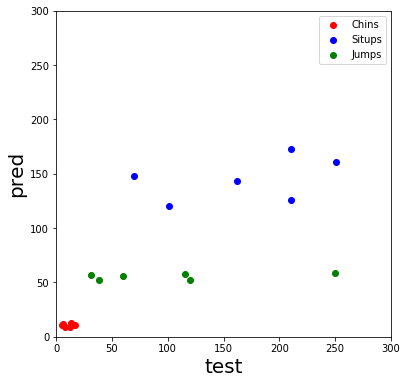

In [252]:
ytest_df = pd.DataFrame(y_test, columns=feature_names)
plt.figure(figsize=(6, 6))
plt.scatter(ytest_df["Chins"], pred_df["Chins"], c="red", label="Chins")
plt.scatter(ytest_df["Situps"], pred_df["Situps"], c="blue", label="Situps")
plt.scatter(ytest_df["Jumps"], pred_df["Jumps"], c="green", label="Jumps")
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.xlabel("test", size=20)
plt.ylabel("pred", size=20)
plt.legend()

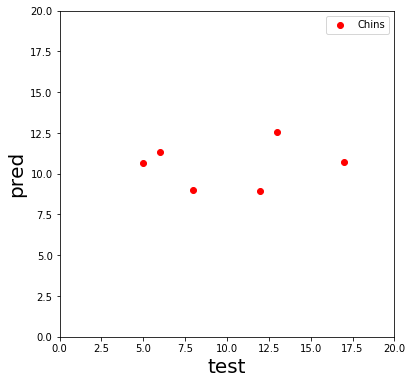

In [253]:
#Chins（赤）を拡大
plt.figure(figsize=(6, 6))
plt.scatter(ytest_df["Chins"], pred_df["Chins"], c="red", label="Chins")
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel("test", size=20)
plt.ylabel("pred", size=20)
plt.legend()

In [254]:
#実際の値は幅広く分布しているが予測値の幅は狭く、正確な予測ができていない。
#データが20個なのでトレーニングデータが少なすぎると考えられる。

# 精度の確認

In [255]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [256]:
MAE = mean_absolute_error(y_test, pred)
MAE

39.425046165177754

In [257]:
RMSE = np.sqrt(mean_squared_error(y_test, pred))
RMSE

61.82750698766613

In [258]:
R2 = r2_score(y_test, pred)
R2

-0.11613487521586159

In [259]:
#データが少ないためか精度は悪い。

# モデルの訓練2

データの解析で
> #腹筋の記録は体重・ウエストともに大きな値なほど低くなっている。

という結果が出ていたのでこれについてモデルの訓練を行う。
また、データが少なくこのまま訓練を行っても精度が悪くなる可能性が高いため、データを2つの領域に分け、ラベルをつけてこのラベルのついて学習してみる。

In [260]:
#体重とウエストのみにする
x2 = x.drop("Pulse", axis=1)
x2

,Weight,Waist
0,191.0,36.0
1,189.0,37.0
2,193.0,38.0
3,162.0,35.0
4,189.0,35.0
5,182.0,36.0
6,211.0,38.0
7,167.0,34.0
8,176.0,31.0
9,154.0,33.0


In [261]:
#Situpsを2グループ(high,low)に分割
situp = pd.Series(feature_df["Situps"])
situp_cut = pd.qcut(situp, 2, precision=1, labels=["low", "high"])
y2 = pd.DataFrame({"label":situp_cut})
y2

,label
0,high
1,low
2,low
3,low
4,high
5,low
6,low
7,high
8,high
9,high


In [262]:
from sklearn.svm import SVC

In [263]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=50)
clf = SVC(random_state=0).fit(x2_train, np.ravel(y2_train))
pred = clf.predict(x2_test)
pred_df = pd.DataFrame({"label":pred})
pred_df

,label
0,low
1,low
2,low
3,low
4,low
5,low


In [264]:
y2_test

,label
15,high
8,high
9,high
18,high
3,low
19,low


In [265]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [266]:
accuracy_score(pred, y2_test),\
precision_score(pred, y2_test, average=None),\
recall_score(pred, y2_test, average=None),\
f1_score(pred, y2_test, average=None)

C:\Users\Yuto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.3333333333333333,
 array([0., 1.]),
 array([0.        , 0.33333333]),
 array([0. , 0.5]))

In [267]:
#２択でも正答率は低い（random_stateによっては正答率0もあった）。
#これでもデータが少ないことが原因か。

交差検証（SVM）

データが少ないので交差検証でモデルの汎化性能を測定してみる

In [268]:
from sklearn.model_selection import cross_val_score

In [269]:
#用いるのはウエスト・体重データ(x2)と腹筋のhigh,lowデータ(y2)
score = cross_val_score(SVC(random_state=0), x2, np.ravel(y2), cv=9)
print(score)
score.mean()

[0.33333333 0.33333333 0.5        1.         0.5        1.
 0.         0.5        0.5       ]


0.5185185185185185

In [270]:
#ハイパーパラメータの最適化
from sklearn.model_selection import GridSearchCV

In [271]:
param_grid={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
grid_search = GridSearchCV(SVC(random_state=0), param_grid, cv=6)
grid_search.fit(x2_train, np.ravel(y2_train))
grid_search.score(x2_test, np.ravel(y2_test))

0.3333333333333333

In [272]:
#最適なハイパーパラメータ
grid_search.best_params_

{'C': 1, 'gamma': 0.001}

In [273]:
score = cross_val_score(GridSearchCV(SVC(random_state=0), param_grid, cv=6), x2, np.ravel(y2), cv=9)
print(score)
score.mean()

[0.33333333 0.66666667 0.5        1.         0.5        1.
 0.5        1.         1.        ]


0.7222222222222222

In [274]:
#ハイパーパラメータの最適化により評価は少しはよくなった。
#それでも評価は良いとはいえない。

# 決定木

In [275]:
from sklearn import tree

In [276]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=None)
clf.fit(x2_train, y2_train)
pred = clf.predict(x2_test)
pred_df = pd.DataFrame({"label":pred})
pred_df

,label
0,low
1,low
2,high
3,high
4,high
5,high


In [277]:
y2_test

,label
15,high
8,high
9,high
18,high
3,low
19,low


In [278]:
accuracy_score(pred, y2_test),\
precision_score(pred, y2_test, average=None),\
recall_score(pred, y2_test, average=None),\
f1_score(pred, y2_test, average=None)

(0.3333333333333333, array([0.5, 0. ]), array([0.5, 0. ]), array([0.5, 0. ]))

[Text(267.84000000000003, 342.46799999999996, 'Weight <= 168.0\ngini = 0.49\nsamples = 14\nvalue = [6, 8]\nclass = low'),
 Text(133.92000000000002, 266.364, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = high'),
 Text(401.76000000000005, 266.364, 'Waist <= 36.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]\nclass = low'),
 Text(267.84000000000003, 190.26, 'Weight <= 185.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = low'),
 Text(133.92000000000002, 114.156, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = low'),
 Text(401.76000000000005, 114.156, 'Weight <= 192.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = high'),
 Text(267.84000000000003, 38.051999999999964, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = high'),
 Text(535.6800000000001, 38.051999999999964, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = low'),
 Text(535.6800000000001, 190.26, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = low')]

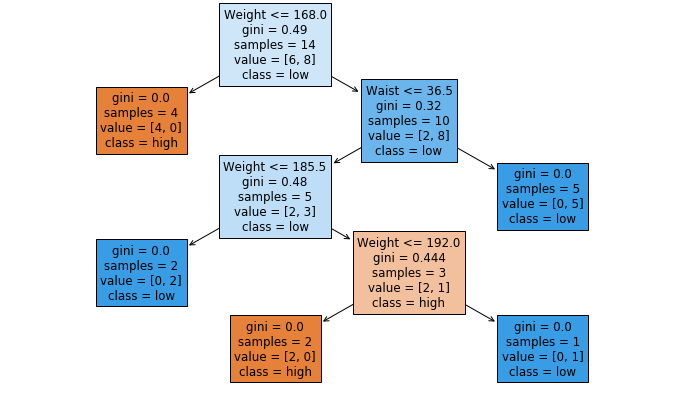

In [279]:
plt.figure(figsize=(12, 7))
tree.plot_tree(clf, feature_names=["Weight", "Waist"], class_names=["high", "low"],
               filled=True, max_depth=None) 

In [280]:
#決定木を見てみるとWeightが168以下のデータ全てをhighとしているがその判断によりテストの２つを間違えている。
#また、Waist <= 36.5の判断でテストの１つを、Weight <= 185.5の判断でテストの１つを間違えている。

交差検証（決定木）

In [281]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state=0), x2, np.ravel(y2), cv=5)
print(score)
score.mean()

[0.5  0.25 0.75 0.5  0.75]


0.55

In [282]:
param_grid={"max_depth":[1,2,3,4]}
grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid_search.fit(x2_train, np.ravel(y2_train))
grid_search.score(x2_test, np.ravel(y2_test))

0.3333333333333333

In [283]:
print(grid_search.best_params_)
#max_depthは1がいいらしい
grid_search.best_score_

{'max_depth': 1}


0.7

In [284]:
score = cross_val_score(GridSearchCV(tree.DecisionTreeClassifier(random_state=0), param_grid, cv=5), x2, np.ravel(y2), cv=5)
print(score)
score.mean()

[0.5  0.5  0.75 0.5  0.75]


0.6

Pulseを加えて決定木

In [285]:
x3 = x
x3.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [286]:
y3 = y2 #Situps
y3.head()

,label
0,high
1,low
2,low
3,low
4,high


In [287]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y2, test_size=0.3, random_state=30)
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=4)
clf.fit(x3_train, y3_train)
pred = clf.predict(x3_test)
pred_df = pd.DataFrame({"label":pred})
pred_df

,label
0,low
1,low
2,low
3,low
4,high
5,low


In [288]:
y3_test

,label
11,high
0,high
15,high
14,low
9,high
6,low


In [289]:
accuracy_score(pred, y3_test),\
precision_score(pred, y3_test, average=None),\
recall_score(pred, y3_test, average=None),\
f1_score(pred, y3_test, average=None)

(0.5, array([0.25, 1.  ]), array([1. , 0.4]), array([0.4       , 0.57142857]))

[Text(334.8, 244.62, 'Waist <= 35.5\ngini = 0.49\nsamples = 14\nvalue = [6, 8]\nclass = low'),
 Text(223.20000000000002, 190.26000000000002, 'Weight <= 146.0\ngini = 0.444\nsamples = 9\nvalue = [6, 3]\nclass = high'),
 Text(111.60000000000001, 135.9, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = low'),
 Text(334.8, 135.9, 'Weight <= 159.5\ngini = 0.375\nsamples = 8\nvalue = [6, 2]\nclass = high'),
 Text(223.20000000000002, 81.54000000000002, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = high'),
 Text(446.40000000000003, 81.54000000000002, 'Weight <= 172.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = high'),
 Text(334.8, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = low'),
 Text(558.0, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = high'),
 Text(446.40000000000003, 190.26000000000002, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = low')]

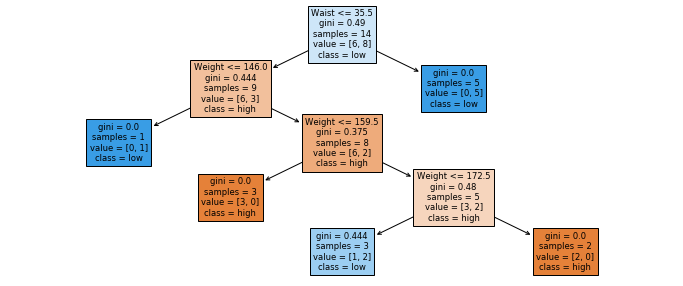

In [292]:
plt.figure(figsize=(12, 5))
tree.plot_tree(clf, feature_names=all_data["target_names"], class_names=["high","low"],
               filled=True, max_depth=None)

In [291]:
#Pulseを加えても決定木にPulseに関する判断は出てこない。

# 仮説の確認
最初に立てた仮説を確認してください．

予測傾向など精度ベースでも仮説を確認することはできますが，決定木や可視化を用いる方が楽かもしれません．

>鍛えている（体重はあるがウエストが細い）人ならば体重の値が大きくとも3つの運動（懸垂・腹筋・跳躍）は高レベルとなると考えられるが、

・体重とウエストの正の相関が強いことから体重はあるがウエストが細いデータはほとんどない

>体重・ウエストともに大きな値であればこれらの運動の記録は低レベルとなるのではないか。

・決定木を見ると体重、ウエストともに大きな値の場合、腹筋の記録は低くなっている

・相関からも体重、ウエストと腹筋の記録の関係が分かる

# 感想

データが20と少なく、予測がうまくいかなかったため様々な方法を試したが正答率が高くなることはなかった。また、目的変数・説明変数がともに3つずつのため予測の方法が分からず調べて行った。
仮説が曖昧だったため、もっと限定的なものにすべきだった。